In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv("Zomato data.csv")

In [11]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [13]:
df.head(15)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [241]:
unique_types,count_types=np.unique(df['listed_in(type)'],return_counts=True)

In [245]:
unique_types,count_types

(array(['Buffet', 'Cafes', 'Dining', 'other'], dtype=object),
 array([  7,  23, 110,   8], dtype=int64))

Text(0.5, 0, 'Type of restaurant')

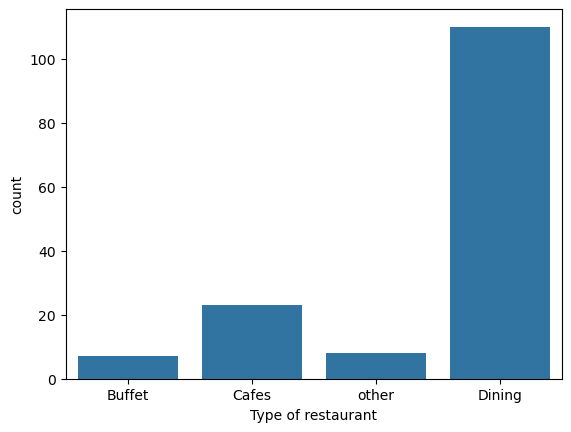

In [356]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of restaurant")

In [294]:
grp_votes=df.groupby('listed_in(type)')['votes'].sum()

In [286]:
popularity_df = pd.DataFrame({'votes': grp_votes})

Text(0.5, 1.0, 'Popularity of different types of restraunts')

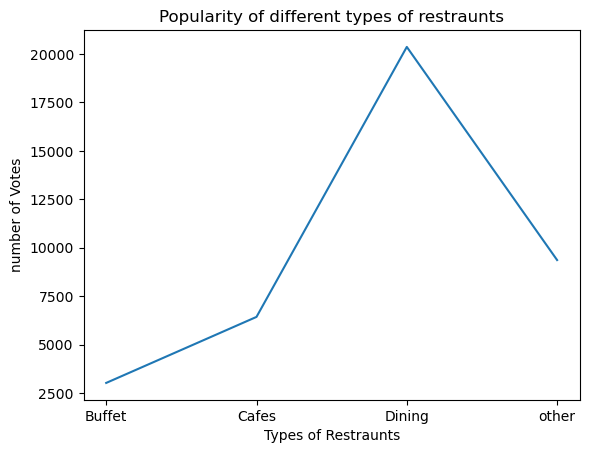

In [288]:
plt.plot(popularity_df)
plt.xlabel('Types of Restraunts')
plt.ylabel('number of Votes')
plt.title('Popularity of different types of restraunts')

In [290]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Approx cost for two people to eat at a restraunt')

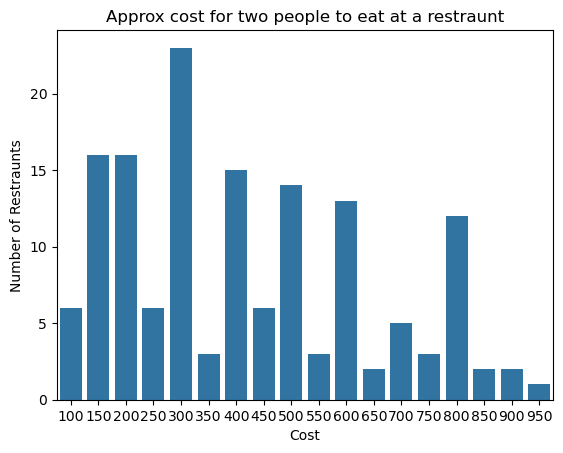

In [370]:
approxCost_data=df['approx_cost(for two people)']
sns.countplot(x=approxCost_data)
plt.xlabel('Cost')
plt.ylabel('Number of Restraunts')
plt.title('Approx cost for two people to eat at a restraunt')

In [332]:
grp_AvgCost=df.groupby('listed_in(type)')['approx_cost(for two people)'].sum()/count_types

In [334]:
avgCost_df = pd.DataFrame({'approx_cost(for two people)': grp_AvgCost})

In [336]:
avgCost_df

,approx_cost(for two people)
listed_in(type),
Buffet,671.428571
Cafes,545.652174
Dining,357.272727
other,668.750000


Text(0.5, 1.0, 'Average cost for 2 people to eat at different types of restraunts')

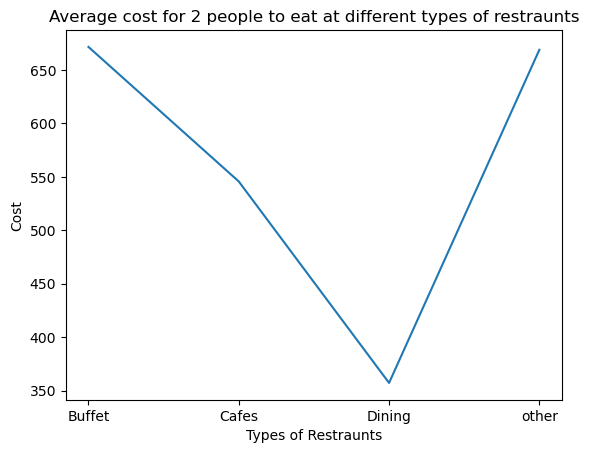

In [344]:
plt.plot(avgCost_df)
plt.xlabel('Types of Restraunts')
plt.ylabel('Cost')
plt.title('Average cost for 2 people to eat at different types of restraunts')

In [99]:
df['rate']

0      4.1/5
1      4.1/5
2      3.8/5
3      3.7/5
4      3.8/5
       ...  
143    3.3/5
144    3.3/5
145    4.0/5
146    3.0/5
147    3.9/5
Name: rate, Length: 148, dtype: object

In [101]:
def ratingEdit(rating):
    rating=rating.split('/')
    rating=rating[0]
    return float(rating)

In [103]:
df['rate']=df['rate'].apply(ratingEdit)

In [105]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 1.0, 'Rating Distribution in restraunts')

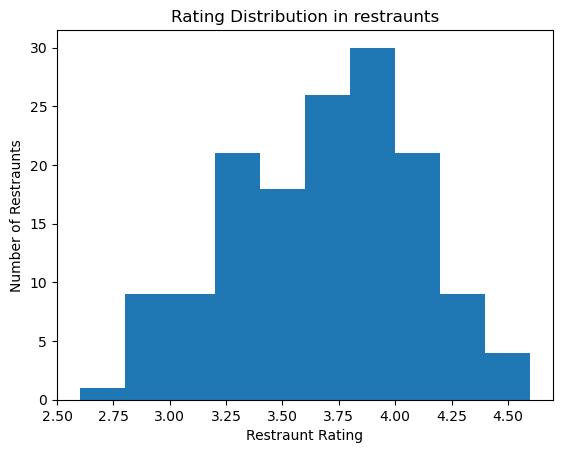

In [231]:
plt.hist(df['rate'])
plt.xlabel('Restraunt Rating')
plt.ylabel('Number of Restraunts')
plt.title('Rating Distribution in restraunts')

In [195]:
unique,count=np.unique(df['online_order'],return_counts=True)

In [197]:
unique,count

(array(['No', 'Yes'], dtype=object), array([90, 58], dtype=int64))

In [199]:
unique[0],unique[1]=unique[1],unique[0]
count[0],count[1]=count[1],count[0]

In [203]:
online_info=dict(zip(unique, count))

In [205]:
online_info

{'Yes': 58, 'No': 90}

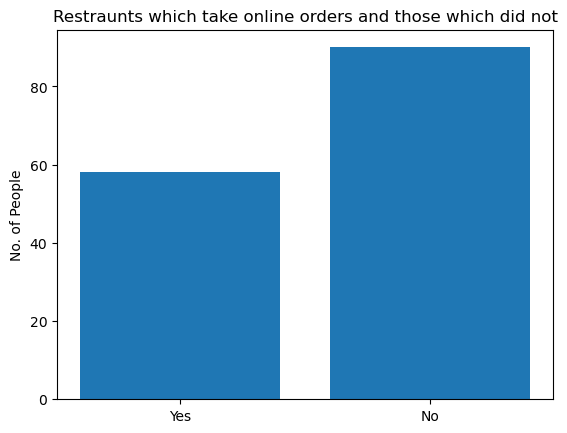

In [350]:
plt.bar(range(len(online_info)), list(online_info.values()), align='center')
plt.xticks(range(len(online_info)), list(online_info.keys()))
plt.xlabel("")
plt.ylabel("No. of People")
plt.title("Restraunts which take online orders and those which did not")
plt.show()

Text(0.5, 1.0, 'Restraunts which take table booking and those which did not')

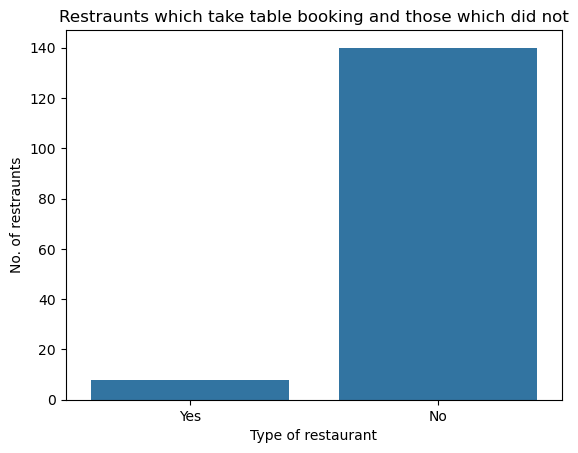

In [362]:
sns.countplot(x=df['book_table'])
plt.xlabel("Type of restaurant")
plt.ylabel("No. of restraunts")
plt.title("Restraunts which take table booking and those which did not")

In [372]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


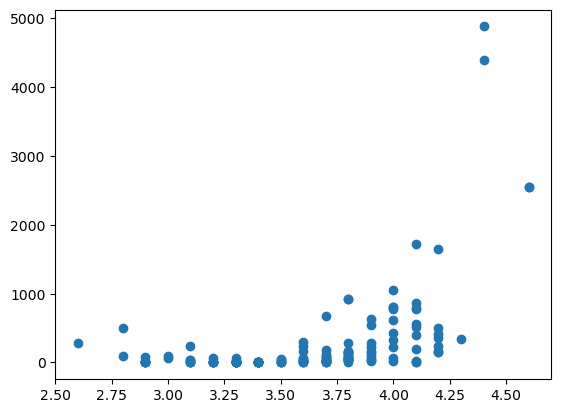

In [380]:
plt.scatter(df['rate'],df['votes'])

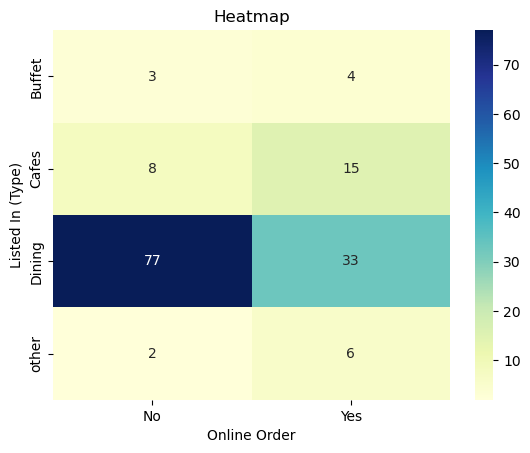

In [386]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()